# Exploratory Data Analysis (MS Big Data and IA) 

For any questions on the course or this notebook: charlotte.laclau@telecom-paris.fr

The purpose of this practical is to make you go through the different eda techniques presented during the course. 
We will work with this lab for several sessions. 

The dataset that we will consider consists of food recipes and recipe reviews covering 18 years of user interactions and uploads on Food.com (formerly GeniusKitchen). It is often used to evaluate machine learning models that perform recipe recommendations. We will mainly study two files : recipe.csv and inter.csv. 

## Organisation of the sessions 


This lab is splitted into several parts. The begining is well guided and has your skills improve, you'll have to be more independent. Mandatory questions are in <span style="color:blue">blue</span> in the subsequent notebook. 
At the end of each part you have a small bonus section. I strongly encourage you to do them (not only for the grade but mostly to improve your python coding skills). 


## Evaluation 

At the end of the course, this lab with be graded. Here are some guidelines about what I expect from you. 
- At the end of our last course, you will upload your notebook along with a `requirement.txt` file on ecampus 
- Your code needs to be carefully commented 
- You have to write a few sentence commenting all the results that you obtained ! I suggest to group results and write intermediate conclusions answering the different questions. 
- I don't want to see any personalized functions or classes in the main notebook. Think modular code! If you want to write specific functions write them in some `utils.py` file. The main notebook code should be as light as possible. 

## Part 1 - Univariate Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Let us start with the recipe file that contains the reciped submitted to the website describes by several features. 
Below you'll find some code to read the data and print the first three rows. I used the `panda` library for these two steps, meaning that I will be manipulating a dataframe object. 

In [2]:
# Import the data and print the first three rows
recipe = pd.read_csv("../data/RAW_recipes.csv")
recipe.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


**Questions** 
- <span style="color:blue">How many recipes are in the file ? </span>
- <span style="color:blue">How many variables do you have. Write the list in a md cell along with the type of the variable for each.</span>
- <span style="color:blue">Are there any missing values in your dataset?</span>

In [3]:
print("Nombre de recettes :", recipe.shape[0])
print("Variables :", recipe.shape[1])
print(recipe.columns)
print("Valeurs manquantes :", recipe.isna().sum().sum())

Nombre de recettes : 231637
Variables : 12
Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')
Valeurs manquantes : 4980


List of variables:
- name

Comments:

### A example of univariate analysis with *minutes*

Let's start by analysing the feature **minutes**. It corresponds to the number of minutes required to make a given recipe. Here a few questions to answer to 
- What is the average time required to make a recipe on the website ? 
- What are the fastest and the longest recipe, and how long do they take ? 

For both questions we will use some statistics including the mean, the minimum and the maximum. 

In [4]:
# Average time
avg_time = recipe["minutes"].mean()
print("Average time for recipes: ", avg_time)

Average time for recipes:  9398.546009488984


Odd ? What do you think ? 
Let's convert the maximum into hours and minutes to make it easier to understand. 

In [5]:
# Get hours with floor division
hours = avg_time // 60

# Get minutes with modulus
minutes = avg_time % 60

print(f"Average time is {round(hours)} hours and {round(minutes)} minutes!")

Average time is 156 hours and 39 minutes!


Seems a lot ! I prefer to order in that case. Let's see what can cause this very high number by trying to answer the second question.

In [6]:
print("Maximum cooking time", recipe["minutes"].max())
print("Minimum cooking time", recipe["minutes"].min())

Maximum cooking time 2147483647
Minimum cooking time 0


So the longest cooking recipe roughly takes around 4085 years to be made ... while the minumum is 0. Seems like we have some outliers. 

Questions
- <span style="color:blue"> Print the row(s) of the dataframe corresponding to the maximum value for minutes </span>
- <span style="color:blue"> Print the number of row(s) of the dataframe corresponding to the minimum value for minutes </span>
- <span style="color:blue"> Choose an appropriate visualisation to highlight these outliers</span>

In [7]:
recipe[recipe["minutes"] == recipe["minutes"].max()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
144074,no bake granola balls,261647,2147483647,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"['rolled oats', 'unsweetened dried shredded co...",8


In [8]:
recipe[recipe["minutes"] == recipe["minutes"].min()].head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
2451,acorn magic delights,1712,0,1534,1999-10-01,"['15-minutes-or-less', 'time-to-make', 'course...","[148.4, 15.0, 28.0, 2.0, 3.0, 21.0, 4.0]",13,"['melt the butter or margarine over low heat',...",NaN,"['butter', 'brown sugar', 'pecans', 'all-purpo...",7
3079,albanian byrek,4880,0,1534,1999-11-24,"['15-minutes-or-less', 'time-to-make', 'course...","[354.4, 42.0, 25.0, 59.0, 37.0, 37.0, 2.0]",14,"['prepare the dough with flour , 1 and a half ...","the directions to this are vague, but maybe yo...","['flour', 'water', 'oil', 'vinegar', 'salt', '...",9
3193,alfredo sauce with pasta,3258,0,1534,1999-10-10,"['15-minutes-or-less', 'time-to-make', 'course...","[1902.9, 287.0, 5.0, 140.0, 104.0, 583.0, 3.0]",8,['cook noodles or fettuccine according to pack...,NaN,"['butter', 'heavy cream', 'parmesan cheese', '...",6
3259,alice s doughnuts,2284,0,1752,1999-10-18,"['15-minutes-or-less', 'time-to-make', 'course...","[107.3, 6.0, 20.0, 3.0, 3.0, 10.0, 4.0]",17,"['in a large bowl , beat the eggs until foamy'...",NaN,"['eggs', 'sugar', 'milk', 'shortening', 'vanil...",9


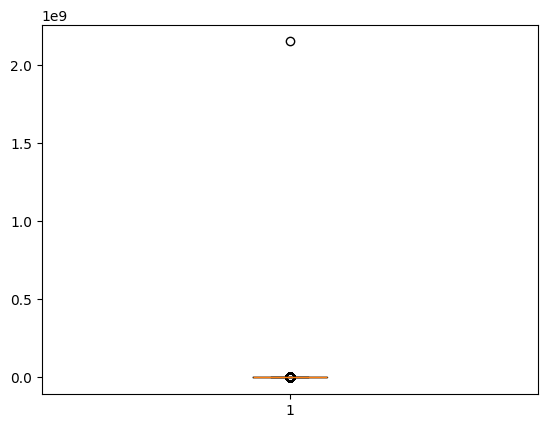

In [9]:
plt.boxplot(recipe["minutes"])
plt.show()

### Matplotlib

#### Online Documentation

The [matplotlib.org](https://matplotlib.org/) project website is the primary online resource for the library's documentation. It contains the example galleries, FAQs, API documentation, and tutorials.
You can take a look at the [Gallery](https://matplotlib.org/stable/gallery/index.html) to see the variety of ways one can make figures.

#### Basics of Matplotlib

Let's start by taking a closer look at the anatomy of a Matplolib plot by answering to the following questions. 

1. **What exactly is a Figure?** 

The top level container for all the plot elements. It is the overall window or page that everything is drawn on. The Figure object is instantiated by calling the `figure()` function from the pyplot module. You can create multiple independent Figures. A Figure can have several other things in it, such as a title, which is a centered title to the figure. You’ll also find that you can add a legend and color bar, for example, to your Figure.

2. **What are the Axes?** 

To the figure you add Axes. Axes object is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D visualisation) Axis objects (x and y). Axes can have ticks, labels, etc. associated with it.


**Note** We have previously imported the `pyplot` module of the `matplotlib` library under the alias `plt`.
Pyplot provides the state-machine interface to the underlying plotting library in matplotlib. This means that figures and axes are implicitly and automatically created to achieve the desired plot. For example, calling `plot` from `pyplot` will automatically create the necessary figure and axes to achieve the desired plot.

Now that we have identified an abnormal values, what can we do with it? 

*Easy answer*: remove it ! (let's do this for now)

*Fancy answer*: consider this as a missing data input and impute it (keep that for later).

**Question**
- <span style="color:blue">Remove the recipe containing these abnormal values and check the new size of the data</span>
- <span style="color:blue">Plot the variable minutes with a boxplot -- this time you can try seaborn!</span>
- <span style="color:blue">Check the new maximum and minimum</span>
- <span style="color:blue">Print the 5 first observations for which abnormal values are observed. Comment</span>
- <span style="color:blue">Propose a strategy to deal with these observations.</span>
- <span style="color:blue">In total how many observations have you removed?</span>

In [10]:
recipe = recipe.drop(recipe.index[recipe["minutes"] == recipe["minutes"].max()])
recipe.loc[recipe["minutes"] == 0, "minutes"] = np.nan

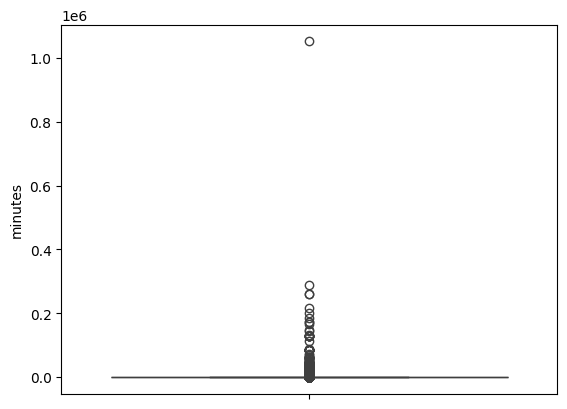

In [11]:
sns.boxplot(recipe["minutes"])
plt.show()

In [12]:
print(recipe["minutes"].min(), recipe["minutes"].max())

1.0 1051200.0


Comments: 

In [13]:
recipe[recipe.minutes > 60 * 24 * 30].head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
5497,angelica liqueur,70551,201610.0,59064,2003-09-04,"['weeknight', 'time-to-make', 'course', 'cuisi...","[891.8, 0.0, 906.0, 0.0, 1.0, 0.0, 76.0]",7,"['crush the fennel , aniseed , coriander seeds...",finish off a large meal with a tiny glass of t...,"['fennel seed', 'anise seed', 'coriander seeds...",7
6545,apple cinnamon liqueur,236379,129615.0,327115,2007-06-21,"['time-to-make', 'course', 'preparation', 'low...","[4.2, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]",7,"['in a quart jar , add apple , cinnamon sticks...",this is amazing. a really nice amber color an...,"['granny smith apple', 'cinnamon sticks', 'vod...",6
8529,armenian basterma dried cured beef,21584,47520.0,29203,2002-03-05,"['weeknight', 'time-to-make', 'course', 'main-...","[5.3, 0.0, 0.0, 102.0, 0.0, 0.0, 0.0]",12,['select very tender cut of beef from rib part...,this is armenian cured spiced beef. it is a wo...,"['beef', 'salt', 'chaimen', 'paprika', 'red pe...",10
12124,bachelor s brandy,41404,86400.0,21752,2002-09-30,"['weeknight', 'time-to-make', 'course', 'main-...","[2716.0, 1.0, 266.0, 0.0, 14.0, 0.0, 62.0]",8,['place the berries in a 1 quart glass contain...,a great way to bring the summer fruits into th...,"['mixed berries', 'granulated sugar', 'vanilla...",4
21938,berry cordial,102098,43380.0,31807,2004-10-15,"['time-to-make', 'course', 'preparation', 'for...","[185.8, 0.0, 111.0, 0.0, 1.0, 0.0, 10.0]",14,"['put berries in a 6-8qt pot and add water', '...",a recipe from my friend roy heflin. note that ...,"['blackberries', 'water', 'sugar', 'vodka']",4


So in this particular case, boxplot suffers from the very high standard deviation observed for the feature minutes. 
Can we come up with a better visualisation ? 

- **Option 1**: use a log-scale on the y axis the feature
- **Option 2**: remove a lot of values

**Questions**: 
- <span style="color:blue"> Print the values of the different quartile (Q1, median and Q3). What can you conclude for this variable ? </span>
- <span style="color:blue"> Compare the mean with the median. What do you observe?</span>
- <span style="color:blue">Create a subplot with on the left the original boxplot, and on the right the same boxplot but with a log scale on the y-axis.</span> 

#### Subplots

The matplotlib.pyplot.subplots method provides a way to plot multiple plots on a single figure. Given the number of rows and columns, it returns a tuple `(fig, ax`), giving a single figure `fig` with an array of axe `ax`.

There is at least three different ways to create a subplot and to add plots to each created ax (dig in the documentation). 
More details on the different arguments of the `subplots` method [here](https://www.educative.io/edpresso/what-is-a-subplots-in-matplotlib).

In [14]:
print(recipe.minutes.quantile([0.25, 0.5, 0.75]))
print(recipe.minutes.mean(), recipe.minutes.median())

0.25    20.0
0.50    40.0
0.75    65.0
Name: minutes, dtype: float64
128.25148996712096 40.0


<Axes: ylabel='minutes'>

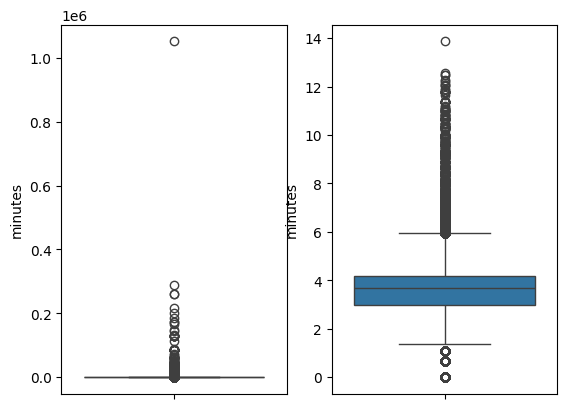

In [15]:
plt.subplot(1, 2, 1)
sns.boxplot(recipe.minutes)
plt.subplot(1, 2, 2)
sns.boxplot(np.log(recipe.minutes))

#### Summing-up: 

Comments.

For now let's keep it this way. We will go back to this matter in the feature engineering session.

Now we can complete this analysis with distribution metrics, namely the skewness and the kurtosis coefficient. 

### Univariate Analysis follow-up 

You are now ready to propose your own analysis for the other variables. 
Consider the following variables: **contributor_id, tags, n_steps, n_ingredients and ingredients**. 
The first step is to formulate questions that you would like to answer to using these variables. 

For example, if we take the contributor_id, please answer the following questions using the varying tools seen during the class. 

**Questions**
- <span style="color:blue">How many unique contributors are there?</span> 
- <span style="color:blue">Who is the contributor that posted the most recipes ? And how many recipes did that person posted ? </span>
- <span style="color:blue">What is the average number of recipes posted by users on the website ? </span>

Start with these three questions, then think about questions for the remaining variables mentioned above. 

In [16]:
print("Contributeurs uniques :", len(recipe.contributor_id.unique()))
print(
    "Contributeur majeur :",
    recipe.contributor_id.mode()[0],
    "avec",
    recipe.contributor_id.value_counts().max(),
)
print("Nombre moyen posté :", recipe.contributor_id.value_counts().mean())

Contributeurs uniques : 27926
Contributeur majeur : 89831 avec 3118
Nombre moyen posté : 8.294635823247154


<Axes: xlabel='submitted', ylabel='Count'>

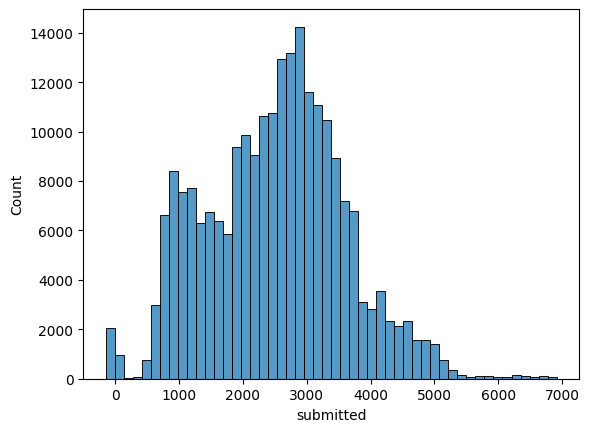

In [17]:
from datetime import date

sns.histplot(
    recipe.submitted.map(lambda x: (date.fromisoformat(x) - date(2000, 1, 1)).days),
    bins=50,
)

<Axes: xlabel='submitted', ylabel='count'>

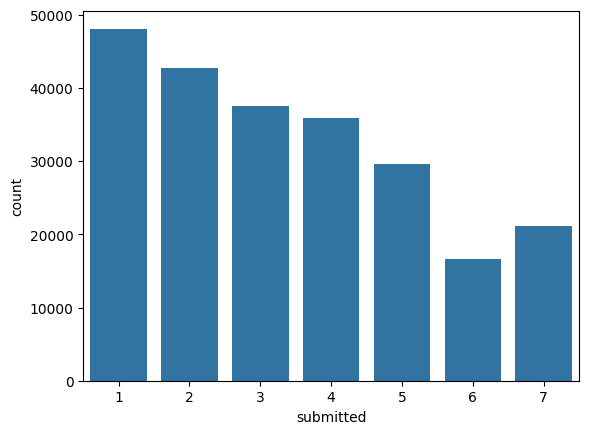

In [19]:
sns.countplot(x=recipe.submitted.map(lambda x: date.fromisoformat(x).isoweekday()))

In [20]:
recipe.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231636.000000,2.305420e+05,2.316360e+05,231636.000000,231636.000000
mean,222014.537887,1.282515e+02,5.534907e+06,9.765503,9.051158
std,141206.916419,2.953313e+03,9.979162e+07,5.995141,3.734803
min,38.000000,1.000000e+00,2.700000e+01,0.000000,1.000000
25%,99943.750000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207248.500000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.500000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,1.051200e+06,2.002290e+09,145.000000,43.000000


...

### Bivariate Analysis

**Questions** 
- <span style="color:blue">Are the longest recipes also the ones that have the more steps? </span> 
- <span style="color:blue">Is there a link between the ingredients and the nutrition score?  </span>
- <span style="color:blue">Is there a relationship between the nutrition score and the number of ingredients?</span>

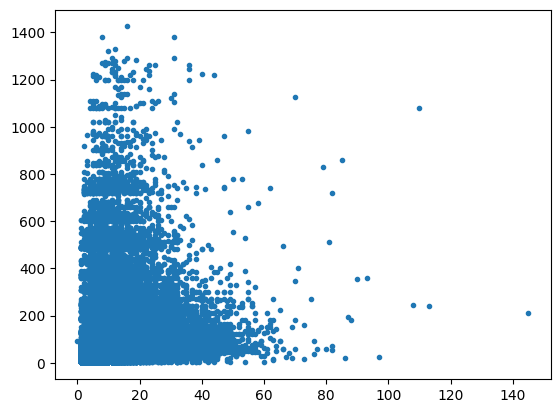

In [21]:
plt.scatter(
    recipe.n_steps[recipe.minutes < 60 * 24],
    recipe.minutes[recipe.minutes < 60 * 24],
    marker=".",
)

In [22]:
recipe["score"] = recipe.nutrition.map(lambda x: eval(x)[0])
recipe["nb_ingredients"] = recipe.ingredients.map(lambda x: len(eval(x)))

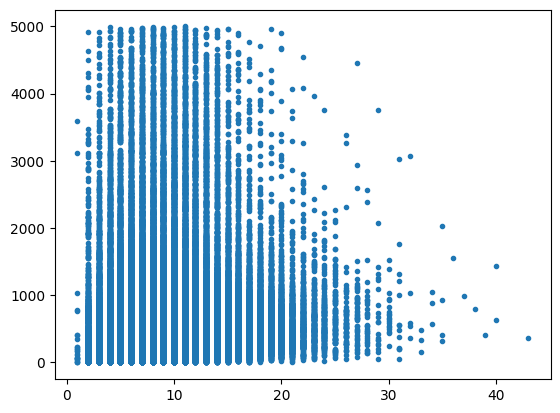

In [23]:
plt.scatter(
    recipe.nb_ingredients[recipe.score < 5000],
    recipe.score[recipe.score < 5000],
    marker=".",
)